In [1]:
!pip install fuzzywuzzy
!pip install openpyxl
!pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [19]:
lap=pd.read_csv('/Users/rokokkula/Downloads/vendor.csv')
act=pd.read_csv('/Users/rokokkula/Downloads/journal_entry.csv')


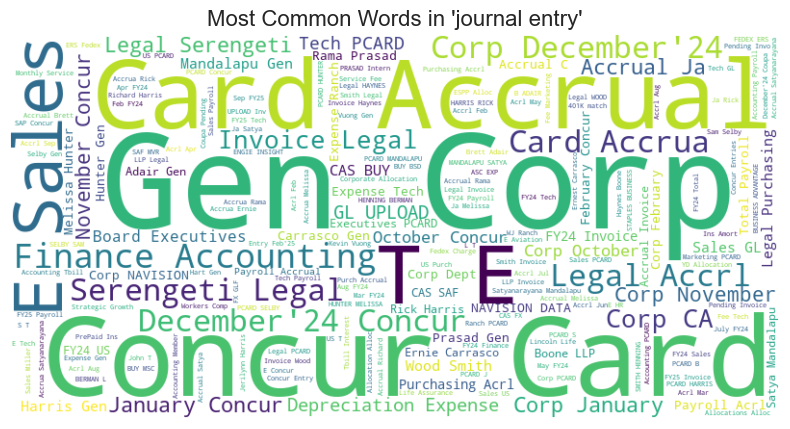

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd


# Example: Generate a word cloud for the 'journal entry' column
def generate_wordcloud(column_data):
    # Combine all text in the column into one large string
    text = ' '.join(column_data.dropna().astype(str))  # Drop NaN, convert to string

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Most Common Words in 'journal entry'", fontsize=16)
    plt.show()


# Call the function on the 'journal entry' column
generate_wordcloud(act['Journal Entry Column'])


In [27]:

!pip install wordcloud

python(90598) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [20]:
import re


# Function to remove non-alphanumeric characters
def remove_non_alphanumeric(text):
    if not isinstance(text, str):
        return text  # Return as is if the entry is not a string
    return re.sub(r'[^A-Za-z\s]', '', text)  # Keep only alphanumeric and spaces





In [21]:
lap.head()
act.head()
lap["c1"] = lap["Vendor Column Unique"].apply(remove_non_alphanumeric).str.upper()
act["c1"] = act["Journal Entry Column"].apply(remove_non_alphanumeric).str.upper()
lap.head()
act.head()

,nbr,Vendor Column Unique
0,1,A/V TRAINING
1,2,AB LITIGATION SERVICES
2,3,ABGI
3,4,ABSTRACT CONSTRUCTION
4,5,ACROBAT


,nbr,Journal Entry Column
0,1,Legal - FY24Q2 Legal Accruals - Unbilled Legal...
1,2,Legal - Rebook Legal & Reclass Coupa - Rebook ...
2,3,Legal - Unbilled Legal Q1 FY24 -
3,4,"Sales - RAZOR'S EDGE CONSULTING, LLC- - Bonus ..."
4,5,Finance & Accounting - Q3 Department Accruals ...


,nbr,Vendor Column Unique,c1
0,1,A/V TRAINING,AV TRAINING
1,2,AB LITIGATION SERVICES,AB LITIGATION SERVICES
2,3,ABGI,ABGI
3,4,ABSTRACT CONSTRUCTION,ABSTRACT CONSTRUCTION
4,5,ACROBAT,ACROBAT


,nbr,Journal Entry Column,c1
0,1,Legal - FY24Q2 Legal Accruals - Unbilled Legal...,LEGAL FYQ LEGAL ACCRUALS UNBILLED LEGAL ACCRUAL
1,2,Legal - Rebook Legal & Reclass Coupa - Rebook ...,LEGAL REBOOK LEGAL RECLASS COUPA REBOOK Q U...
2,3,Legal - Unbilled Legal Q1 FY24 -,LEGAL UNBILLED LEGAL Q FY
3,4,"Sales - RAZOR'S EDGE CONSULTING, LLC- - Bonus ...",SALES RAZORS EDGE CONSULTING LLC BONUS PAYME...
4,5,Finance & Accounting - Q3 Department Accruals ...,FINANCE ACCOUNTING Q DEPARTMENT ACCRUALS EY...


In [22]:
# Define a function to apply the manual mapping to text

# Manual mappings dictionary
manual_mappings = {
    "PRICEW": "PRICEWATERHOUSE COOPERS",
    "Erns": "EY",
    "EXPNSWTCH": "EXPENSE WATCH",
    "Baker &": "BAKER & MCKENZIE",
    "Baker & McKe": "BAKER & MCKENZIE",
    "Grant Tho": "GRANT THORNTON",
    "WASTE MANAGEME": "WASTE MANAGEMENT",
    "The Addiso": "THE ADDISON GROUP",
    "PWC": "PRICEWATERHOUSE COOPERS",
    "SOVO": "SOVOS TECHNOLOGIES",
    "SOVOS COMPLIANCE": "SOVOS TECHNOLOGIES",
    "SOVOS COMPLIANCE ": "SOVOS TECHNOLOGIES",
    "E*TRADE": "E TRADE",
    "BOMBADIER": "BOMBARDIER AEROSPACE CORPORATION",
    "AWS": "AMAZON WEB SERVICES",
    "COHNREZNICK": "COHN REZNICK",
    "COHN REZNIC": "COHN REZNICK",
    "ERNST & YOUNG": "EY",
    "ERNST & YOUNG US LLP": "EY",
    "ERNST & YOUNG US": "EY",
    "WM TRASH": "WASTE MANAGEMENT",
    "WF": "WELLS FARGO",
    "C & J SHREDDING": "C&J SHREDDING",
    "Sim, Parvathan": "SIM PARVATHANENI & BROWN",
    "Morgan": "MORGAN STANLEY",
    "MYERS PEDIA GROUP": "MYERS MEDIA GROUP",
    "SIM P AND BROWN": "SIM PARVATHANENI & BROWN",
    "REUTERS NEWS & MEDIA": "THOMSON REUTERS",
    "CCS": "COMPUTER CONFIGURATION SERVICE",
    "GUIDEPOINT": "GUIDEPOINT SECURITY",
    "HPE": "HEWLETT PACKARD ENTERPRISES",
    "KEEPER": "KEEPER SECURITY",
    "REDIS": "REDIS ENTERPRISE",
    "COMPUTER CONFIG SERVICE": "COMPUTER CONFIGURATION SERVICE",
    "CORPIT": "CORP IT",
    "CDW": "CDW COMPUTER CENTERS",
    "COMMIT CONSULTANTS": "COMMIT CONSULTING GROUP",
    "BOFA": "BANK OF AMERICA",
    "GIBSON, DUNN & CRUTCHER": "GIBSON DUNN & CRUTCHER",
    "HILGERS GRABER": "HILGERS GRABEN",
    "INDEED.COM": "INDEED",
    "LEXIS NEXIS": "LEXISNEXIS",
    "MAYER": "MAYER LLP",
    "MINTZER SAROWITZ ZERIS LEDVA": "MINTZER, SAROWITZ, ZERIS, LEDVA",
    "MONRONEYLABELS": "MONRONEY LABELS",
    "MONRONEYLABELS.COM": "MONRONEY LABELS",
    "POWER SOURCE": "POWERSOURCE",
    "REEDSMITH": "REED SMITH",
    "SUREFIRE": "SUREFIRE TECHNOLOGIES",
    "TEXADIA": "TEXADIA SYSTEMS",
    "UAS INT": "UAS INTERNATIONAL TRIP SUPPORT",
    "WORLD FUEL": "WORLD FUEL SERVICES",
    "RYAN, LLC": "RYAN LLC",
    "LINDE GAS": "LINDE GAS & EQUIPMENT",
    "Dunc": "DUNCAN AVIATION",
    "ERNST & YOUNG": "EY",
    " EY ": "EY",
    "Monroneny": "MONRONEY LABELS",
    "BAKER & MCKENZIE ": "BAKER & MCKENZIE",
    "BAKER & MCKENZIE LLP": "BAKER & MCKENZIE",
    "COHNREZNICK": "COHN REZNICK",
    "PRICEW": "PRICEWATERHOUSE COOPERS",
    "PRICEWATERHOUSE COOPERS-": "PRICEWATERHOUSE COOPERS",
    "VERTEX INC": "VERTEX",
    "NUANCE INNOVATION": "NUANCE INNOVATION",
    "WILSON SONS" : "WILSON SONSINI",
    "WORKDAY INC" : "WORKDAY",
    "AUTO CLUB INSUR" : "AUTO CLUB INSURANCE",
    "MONRONEYLABE" : "MONRONEY LABELS",
    "MONRONEYLABELS.COM" : "MONRONEY LABELS"
}
def apply_manual_mappings(text, mappings):
    if not isinstance(text, str):
        return text  # Return as is if the entry is not a string
    for key, value in mappings.items():
        text = text.replace(key, value)  # Replace occurrences of key with value
    return text


# Apply the function to the 'journal entry' column

lap['c2'] = lap['c1'].apply(lambda x: apply_manual_mappings(x, manual_mappings))
act['c2'] = act['c1'].apply(lambda x: apply_manual_mappings(x, manual_mappings))
lap.head()
act.head()



,nbr,Vendor Column Unique,c1,c2
0,1,A/V TRAINING,AV TRAINING,AV TRAINING
1,2,AB LITIGATION SERVICES,AB LITIGATION SERVICES,AB LITIGATION SERVICES
2,3,ABGI,ABGI,ABGI
3,4,ABSTRACT CONSTRUCTION,ABSTRACT CONSTRUCTION,ABSTRACT CONSTRUCTION
4,5,ACROBAT,ACROBAT,ACROBAT


,nbr,Journal Entry Column,c1,c2
0,1,Legal - FY24Q2 Legal Accruals - Unbilled Legal...,LEGAL FYQ LEGAL ACCRUALS UNBILLED LEGAL ACCRUAL,LEGAL FYQ LEGAL ACCRUALS UNBILLED LEGAL ACCRUAL
1,2,Legal - Rebook Legal & Reclass Coupa - Rebook ...,LEGAL REBOOK LEGAL RECLASS COUPA REBOOK Q U...,LEGAL REBOOK LEGAL RECLASS COUPA REBOOK Q U...
2,3,Legal - Unbilled Legal Q1 FY24 -,LEGAL UNBILLED LEGAL Q FY,LEGAL UNBILLED LEGAL Q FY
3,4,"Sales - RAZOR'S EDGE CONSULTING, LLC- - Bonus ...",SALES RAZORS EDGE CONSULTING LLC BONUS PAYME...,SALES RAZORS EDGE CONSULTING LLC BONUS PAYME...
4,5,Finance & Accounting - Q3 Department Accruals ...,FINANCE ACCOUNTING Q DEPARTMENT ACCRUALS EY...,FINANCE ACCOUNTING Q DEPARTMENT ACCRUALS EY ...


In [39]:
ignore_words = [
    "CHASE", "EY", "AWS", "PWC", "WF", "ONE T", "RICOH", "IARA", "MBSI", "JONCO", "MAPTIVE", "HPE", "ADP", "LAVERY",
    "IBM", "BOA", "BDO", "BOFA", "BMO", "DELL", "ENGIE", "FASB", "IQ EQ", "JAMS", "MAYER", "REDIS", "RYAN", "VACO",
    "STNT", "T&E", "BOD", "EXCELL", "SEMA", "EW", "FORD", "DUNC",'CARD','ACCRUAL','SALES','GEN CORP',"LEGAL",'FINANCE','ACCOUNTING','CONCUR','INVOICE','DECEMBER','ACCRL','JANUARY','UPLOAD','DEPRECIATION','EXPENSE','EW','FY','US','PURCH','AUG','JAN','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC',
    'JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER','ACRL','LLP','REFUND'

]
for x in ignore_words:
    lap['c2']=lap['c2'].str.replace(x, '')
    act['c2']=act['c2'].str.replace(x, '' )
lap['c3']=lap['c2'].str.strip()
act['c3']=act['c2'].str.strip()

lap.head()
act.head()

,nbr,Vendor Column Unique,c1,c2,c3
0,1,A/V TRAINING,AV TRAINING,AV TRAINING,AV TRAINING
1,2,AB LITIGATION SERVICES,AB LITIGATION SERVICES,AB LITIGATION SERVICES,AB LITIGATION SERVICES
2,3,ABGI,ABGI,ABGI,ABGI
3,4,ABSTRACT CONSTRUCTION,ABSTRACT CONSTRUCTION,ABSTRACT CONSTRUCTION,ABSTRACT CONSTRUCTION
4,5,ACROBAT,ACROBAT,ACROBAT,ACROBAT


,nbr,Journal Entry Column,c1,c2,c3
0,1,Legal - FY24Q2 Legal Accruals - Unbilled Legal...,LEGAL FYQ LEGAL ACCRUALS UNBILLED LEGAL ACCRUAL,Q S UNBILLED,Q S UNBILLED
1,2,Legal - Rebook Legal & Reclass Coupa - Rebook ...,LEGAL REBOOK LEGAL RECLASS COUPA REBOOK Q U...,REBOOK RECLASS COUPA REBOOK Q UNBILLED ACCR,REBOOK RECLASS COUPA REBOOK Q UNBILLED ACCR
2,3,Legal - Unbilled Legal Q1 FY24 -,LEGAL UNBILLED LEGAL Q FY,UNBILLED Q,UNBILLED Q
3,4,"Sales - RAZOR'S EDGE CONSULTING, LLC- - Bonus ...",SALES RAZORS EDGE CONSULTING LLC BONUS PAYME...,RAZORS EDGE CONSULTING LLC BON PAYMENT PER ...,RAZORS EDGE CONSULTING LLC BON PAYMENT PER TH...
4,5,Finance & Accounting - Q3 Department Accruals ...,FINANCE ACCOUNTING Q DEPARTMENT ACCRUALS EY...,Q DEPARTMENT S PRICATERHOE COOPERS,Q DEPARTMENT S PRICATERHOE COOPERS


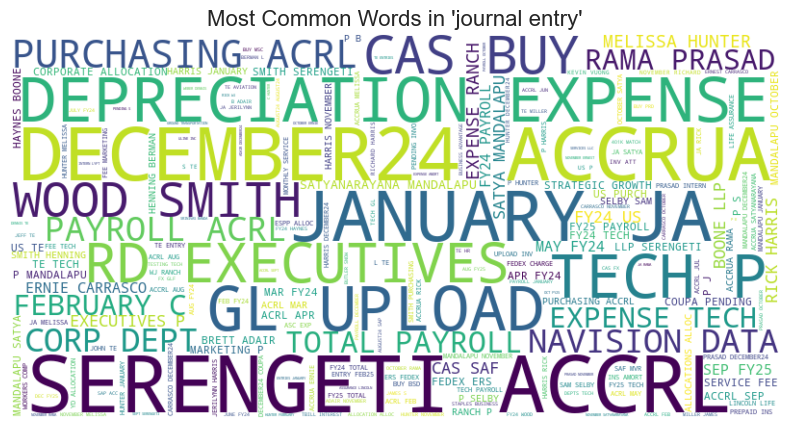

In [46]:
generate_wordcloud(act['c3'])

In [38]:
#Legal - Purchasing Accrl - Sep FY25 - Invoice # 2024092451 GIBSON,
act.loc[act['Journal Entry Column']=='Legal - AUG- FY24 US Purch Accrual - Invoice # 2023084312 Gibson D',]

,nbr,Journal Entry Column,c1,c2,c3
59128,59129,Legal - AUG- FY24 US Purch Accrual - Invoice #...,LEGAL AUG FY US PURCH ACCRUAL INVOICE GIBS...,GIBSON D,GIBSON D
59854,59855,Legal - AUG- FY24 US Purch Accrual - Invoice #...,LEGAL AUG FY US PURCH ACCRUAL INVOICE GIBS...,GIBSON D,GIBSON D


In [35]:
fuzz.token_set_ratio('GIBSON D', 'GIBSON DUNN  CRUTCHER')

85.71428571428571

In [40]:
from rapidfuzz import fuzz
import pandas as pd
import time
from joblib import Parallel, delayed

# Sample data for lapx and actx
lapx = lap.copy()
actx = act.copy()
start_time = time.time()
def process_row(i):
    row = lapx.iloc[i]

    temp = actx.copy()
    results = []

    for j in range(temp.shape[0]):
        temp_row = temp.iloc[j]
        overall_score= fuzz.token_set_ratio(row['c3'], temp_row['c3'])

        if (overall_score > 80):
            add_row = [
            row['nbr'], row['Vendor Column Unique'], row['c3'],
            temp_row['nbr'], temp_row['Journal Entry Column'], temp_row['c3'],
            overall_score
            ]
            results.append(add_row)

    return results

# Run the parallel processing
results = Parallel(n_jobs=-1)(delayed(process_row)(i) for i in range(lapx.shape[0]))
#results = Parallel(n_jobs=-1)(delayed(process_row)(i) for i in range(10))

# Flatten the results list
mat = [item for sublist in results for item in sublist]


# Display the result

print("--- %s seconds ---" % (time.time() - start_time))
mat=pd.DataFrame(mat,columns=['nbr', 'Vendor Column Unique', 'clean journal', 'nbr', 'Journal Entry Column', 'clean vendor', 'score',])
mat.head()


--- 193.07753705978394 seconds ---


,nbr,Vendor Column Unique,clean journal,nbr,Journal Entry Column,clean vendor,score
0,1,A/V TRAINING,AV TRAINING,688,"Aviation - PCARD FERNANDES, SAVIO - Recurrent ...",AVIATION P FERNANDES SAVIO RECURRENT TRAINING,84.210526
1,1,A/V TRAINING,AV TRAINING,2564,HR - WORKDAY INC- 242976 - Prepaid Training Cr...,HR WORKDAY PREPAID TRAINING CREDITS,84.210526
2,1,A/V TRAINING,AV TRAINING,8034,Finance & Accounting - THE CAITLYN ROSS GROUP ...,THE CAITLYN ROSS GROUP LLC EMP TRAINING REIMB...,84.210526
3,1,A/V TRAINING,AV TRAINING,9085,Finance & Accounting - PCARD E. CARRASCO - Str...,P E CARRASCO STRATEGIC SOURCING TRAINING C,84.210526
4,1,A/V TRAINING,AV TRAINING,83739,HR - KANTOLA TRAINING SOLUTIONS LLC - License ...,HR KANTOLA TRAINING SOLUTIONS LLC LICENSE FO...,84.210526


In [41]:
mat.to_excel('tanner_request_3.xlsx')

In [25]:
import os
os.getcwd()

'/Users/rokokkula/Library/CloudStorage/OneDrive-Copart,Inc/Mac Backup Feb 5, 2025/Documents mac/scientificProject'

In [ ]:
import pandas as pd
import re
from thefuzz import process
import os

# File path
df_mapped_path = r"C:\Users\talange\OneDrive - Copart, Inc\TeamDrive - Strategic Analytics & Data Science\Finance\G&A\Vendor Mapped - Python Coded.xlsx"
df_mapped = pd.read_excel(df_mapped_path, sheet_name="Vendor Mapped", header=3)
df_mapped.columns = df_mapped.columns.str.strip()

# Verify necessary columns
if "Journal Entry Column" not in df_mapped.columns or "Vendor Column Unique" not in df_mapped.columns:
    raise KeyError(f"Check column names. Available columns: {df_mapped.columns.tolist()}")

# Standardizing text for faster matching
df_mapped["Vendor Column Unique"] = df_mapped["Vendor Column Unique"].str.upper().str.strip()
df_mapped["Journal Entry Column"] = df_mapped["Journal Entry Column"].str.upper().str.strip()


# Compile regex patterns for manual mapping to improve performance
manual_pattern = re.compile("|".join(map(re.escape, manual_mappings.keys())))

# List of words to ignore
ignore_words = {
    "CHASE", "EY", "AWS", "PWC", "WF", "ONE T", "RICOH", "IARA", "MBSI", "JONCO", "MAPTIVE", "HPE", "ADP", "LAVERY",
    "IBM", "BOA", "BDO", "BOFA", "BMO", "DELL", "ENGIE", "FASB", "IQ EQ", "JAMS", "MAYER", "REDIS", "RYAN", "VACO",
    "STNT", "T&E", "BOD", "EXCELL", "SEMA", "EW", "FORD", "DUNC",
}

# Manual mapping function
def map_vendor(entry):
    # Step 1: Manual mappings check (faster than fuzzy match)
    manual_match = manual_pattern.search(entry)
    if manual_match:
        return manual_mappings[manual_match.group()]

    # Step 2: Exact match in 'Vendor Column Unique'
    exact_match = df_mapped[df_mapped["Vendor Column Unique"].str.contains(re.escape(entry), case=False, na=False)]
    if not exact_match.empty:
        return exact_match.iloc[0]["Vendor Column Unique"]

    # Step 3: Fuzzy match fallback using `process.extractOne` (faster than looping)
    vendor_list = df_mapped["Vendor Column Unique"].tolist()
    best_match, score = process.extractOne(entry, vendor_list)
    if score > 85:
        return best_match

    # Step 4: Return default message if no match found
    return "No Vendor Match Identified / Negligible"

# Process entries
df_mapped["Matched Vendor"] = df_mapped["Journal Entry Column"].map(map_vendor)

# Save the results to a new file
new_file_path = os.path.join(os.path.dirname(df_mapped_path), "Vendor Mapped - Results.xlsx")
df_mapped.to_excel(new_file_path, index=False)
